# Clustering

## K-means

Run this cell to read and display top 5 rows of data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cluster_data = pd.read_csv("healthcare-dataset.csv")
cluster_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,clusters
0,1,67.0,0,1,1,2,228.69,36.600000,2
1,0,61.0,0,0,1,3,202.21,28.893237,0
2,1,80.0,0,1,1,2,105.92,32.500000,2
3,0,49.0,0,0,1,2,171.23,34.400000,0
4,0,79.0,1,0,1,3,174.12,24.000000,3


Imported the required libraries such as Pandas, Numpy, Seaborn, and Matplotlib to work with data and visualize it.
Displayed the first five rows of the dataset using the head() function.

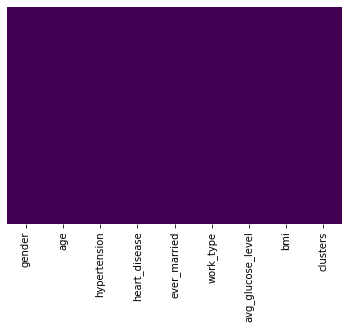

In [11]:
df=cluster_data
#to check the missing values with help of a visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Used the sns.heatmap() function from the Seaborn library to create a heatmap visualization of missing values in the dataset. The df.isnull() method returns a DataFrame of the same shape as df, with Boolean values indicating whether each element is missing or not. The heatmap uses a yellow-orange color palette (cmap='viridis') to represent the presence or absence of missing values in each column (yticklabels=False, cbar=False).








Map the categorical data for further processing.

In [12]:
df['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [13]:
work_type= pd.get_dummies(df['work_type'],drop_first=True)

In [14]:
work_type.columns

Int64Index([1, 2, 3, 4], dtype='int64')

In [15]:
new_column_names = {1: 'W_T_1',
                    2: 'W_T_2',
                    3:'W_T_3',
                    4:'W_T_4'}

In [16]:
work_type = work_type.rename(columns=new_column_names)

In [17]:
work_type

,W_T_1,W_T_2,W_T_3,W_T_4
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5105,0,1,0,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [18]:
df = pd.concat([df, work_type], axis=1)
df = df.drop('work_type', axis=1)

In [19]:
df


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,clusters,W_T_1,W_T_2,W_T_3,W_T_4
0,1,67.0,0,1,1,228.69,36.600000,2,0,1,0,0
1,0,61.0,0,0,1,202.21,28.893237,0,0,0,1,0
2,1,80.0,0,1,1,105.92,32.500000,2,0,1,0,0
3,0,49.0,0,0,1,171.23,34.400000,0,0,1,0,0
4,0,79.0,1,0,1,174.12,24.000000,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,83.75,28.893237,3,0,1,0,0
5106,0,81.0,0,0,1,125.20,40.000000,0,0,0,1,0
5107,0,35.0,0,0,1,82.99,30.600000,0,0,0,1,0
5108,1,51.0,0,0,1,166.29,25.600000,0,0,1,0,0



- Created dummy variables for the 'work_type' column using `pd.get_dummies()`, with the parameter `drop_first=True` to drop the first column of the resulting dummy variables to avoid multicollinearity.
- Renamed the resulting columns using a dictionary that maps integers to new column names.
- Appended the new `work_type` columns to 'df' using `pd.concat()`.
- Droped the original `work_type` column from the dataframe using `df.drop()`.



Scale the data for further processing. 

In [20]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit the scaler to the age, bmi, and avg_glucose_level columns
scaler.fit(df[['age', 'bmi', 'avg_glucose_level']])

# transform the age, bmi, and avg_glucose_level columns using the scaler
df[['age', 'bmi', 'avg_glucose_level']] = scaler.transform(df[['age', 'bmi', 'avg_glucose_level']])


In [21]:
df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,clusters,W_T_1,W_T_2,W_T_3,W_T_4
0,1,1.051434,0,1,1,2.706375,1.001234e+00,2,0,1,0,0
1,0,0.786070,0,0,1,2.121559,1.846221e-15,0,0,0,1,0
2,1,1.626390,0,1,1,-0.005028,4.685773e-01,2,0,1,0,0
3,0,0.255342,0,0,1,1.437358,7.154182e-01,0,0,1,0,0
4,0,1.582163,1,0,1,1.501184,-6.357112e-01,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1.626390,1,0,1,-0.494658,1.846221e-15,3,0,1,0,0
5106,0,1.670617,0,0,1,0.420775,1.442949e+00,0,0,0,1,0
5107,0,-0.363842,0,0,1,-0.511443,2.217363e-01,0,0,0,1,0
5108,1,0.343796,0,0,1,1.328257,-4.278451e-01,0,0,1,0,0


In [22]:
df=df.drop('clusters', axis=1)

Imported the StandardScaler class from the Scikit-learn library, which is used to scale numerical data. It then creates a StandardScaler object called 'scaler' and fits it to the 'age', 'bmi', and 'avg_glucose_level' columns of the 'df' DataFrame. The 'fit' method computes the mean and standard deviation of the data in the columns. The 'transform' method is then called to scale the data in these columns. Finally, the scaled data is assigned back to the original columns in the 'df' DataFrame. This step is important because the KMeans algorithm works better when the data is centered around zero and has the same variance in each feature.

 using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

Performed the elbow method for k from 2 to 7 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 


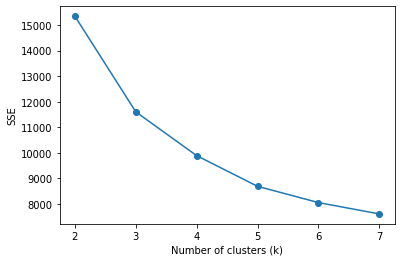

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# create a list to store the SSE values for each value of k
sse = []

# fit a k-means clustering model for each value of k from 2 to 7
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# plot the SSE values for each value of k
plt.plot(range(2, 8), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

After importing the necessary libraries - KMeans from sklearn.cluster and matplotlib.pyplot. It then initializes an empty list sse to store the SSE values for each k value.

A for loop is used to fit a KMeans clustering model for each k value from 2 to 7. The KMeans function is called with n_clusters=k and random_state=42 (for reproducibility). The fit method is called on the data, and the SSE value is obtained using the inertia_ attribute of the KMeans object. The SSE value is then appended to the sse list.

Finally, a line plot is created using plt.plot with x-axis values as range(2, 8) and y-axis values as the sse list. marker='o' is used to mark the data points on the plot, and xlabel and ylabel are used to label the axes. The plot is displayed using plt.show().

This plot can help us visualize the "elbow point" or the point at which the SSE starts decreasing at a slower rate. This point is usually considered as the optimal number of clusters for the given dataset.







The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.



Silhouette score for k=2: 0.24266081974350173
Silhouette score for k=3: 0.2934871303727263
Silhouette score for k=4: 0.2626885726838557
Silhouette score for k=5: 0.24706400839285925
Silhouette score for k=6: 0.23432345978387253
Silhouette score for k=7: 0.2230873336764789


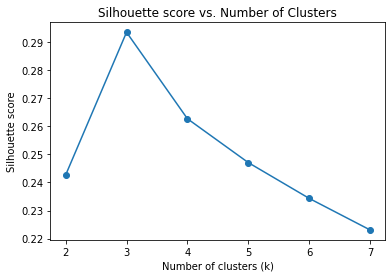

In [24]:
from sklearn.metrics import silhouette_score

# create a list to store the silhouette scores for each k value
silhouette_scores = []

# loop through k values from 2 to 7
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)
    print(f'Silhouette score for k={k}: {score}')

# plot the silhouette scores for each k value
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs. Number of Clusters')
plt.show()

From the results, we can see that the silhouette score is highest for k=3, which means that the data points are more similar to their own clusters than to other clusters for k=3. Therefore, k=3 would be the best choice for this dataset.



With the best K value use K-means algorithm on the data. Printed out the whole data along with the cluster labels assigned for each row in the form of new column.

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)

# fit and predict cluster labels for data
labels = kmeans.fit_predict(df)

# add new column to original DataFrame with assigned cluster labels
df['clusters_2'] = labels

# print whole data with assigned cluster labels
print(df)

      gender       age  hypertension  heart_disease  ever_married  \
0          1  1.051434             0              1             1   
1          0  0.786070             0              0             1   
2          1  1.626390             0              1             1   
3          0  0.255342             0              0             1   
4          0  1.582163             1              0             1   
...      ...       ...           ...            ...           ...   
5105       0  1.626390             1              0             1   
5106       0  1.670617             0              0             1   
5107       0 -0.363842             0              0             1   
5108       1  0.343796             0              0             1   
5109       0  0.034205             0              0             1   

      avg_glucose_level           bmi  W_T_1  W_T_2  W_T_3  W_T_4  clusters_2  
0              2.706375  1.001234e+00      0      1      0      0           0  
1          

This code initializes the KMeans clustering algorithm with n_clusters=3 and random_state=42. It then fits the algorithm to the df dataset and assigns cluster labels to each row of the data. The assigned labels are added as a new column named "clusters_2" to the df DataFrame. Finally, the entire DataFrame is printed to display the original data along with the assigned cluster labels.

In [26]:
df['clusters_2']

0       0
1       0
2       2
3       0
4       0
       ..
5105    2
5106    2
5107    2
5108    0
5109    2
Name: clusters_2, Length: 5110, dtype: int32

In [27]:
cluster_means = df.groupby('clusters_2').mean()
print(cluster_means)

              gender       age  hypertension  heart_disease  ever_married  \
clusters_2                                                                  
0           0.476395  0.776832      0.254649       0.155937      0.902718   
1           0.437113 -1.222856      0.001375       0.001375      0.091409   
2           0.388363  0.418217      0.107578       0.055819      0.875846   

            avg_glucose_level       bmi     W_T_1     W_T_2     W_T_3  \
clusters_2                                                              
0                    2.177107  0.550314  0.000000  0.602289  0.238913   
1                   -0.278913 -0.823818  0.013746  0.435052  0.030241   
2                   -0.377530  0.275367  0.000677  0.632950  0.205683   

               W_T_4  
clusters_2            
0           0.001431  
1           0.471478  
2           0.000000  


By analyzing these results, we can observe that cluster 1 has lower values for age, average glucose level, and BMI, and has a higher proportion of patients who have never been married, compared to other clusters. Cluster 2 has higher values for age and BMI, and a higher proportion of patients who work in private jobs compared to other clusters. Cluster 0 has higher values for average glucose level and a higher proportion of patients who work in self-employed jobs. These observations can help healthcare professionals to better understand patient populations and tailor their treatments accordingly.

 ## Hierarchical Clustering

In [28]:
import pandas as pd

data = pd.read_csv("hierarchical_data.csv")
data.head()

,X,Y
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699



Ploted the co-ordinates from the imported data 

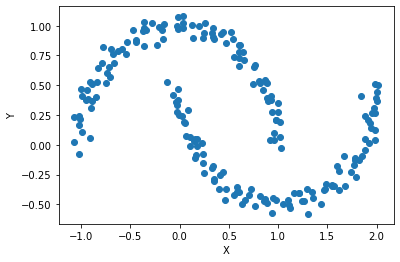

In [29]:
import matplotlib.pyplot as plt
plt.scatter(data['X'], data['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

From the plot we can see that two clusters in the data. one in the top right quadrant and another in the bottom left quadrant.

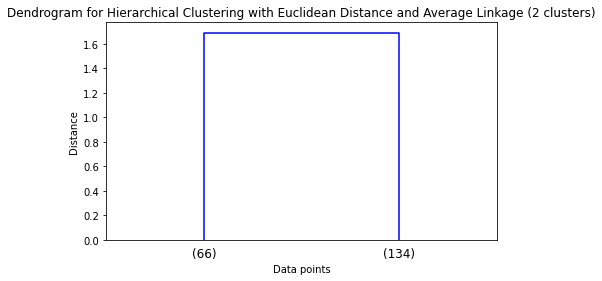

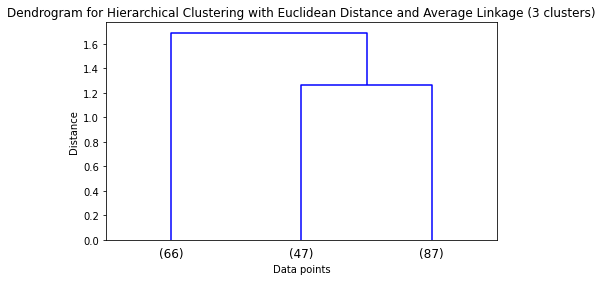

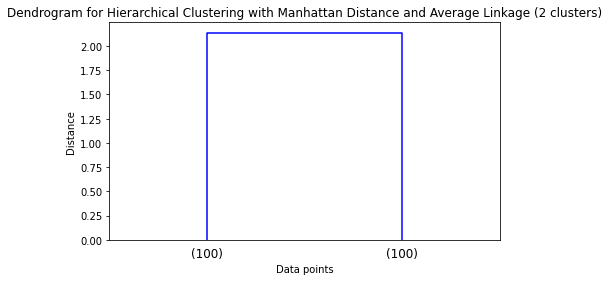

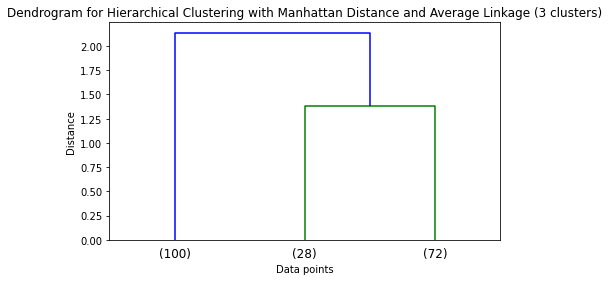

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
# perform hierarchical clustering with Euclidean distance and average linkage
Z_euc_avg = linkage(data, method='average', metric='euclidean')

# plot the dendrogram for cluster 2
plt.figure(figsize=(7, 4))
dendrogram(Z_euc_avg, truncate_mode='lastp', p=2)
plt.title('Dendrogram for Hierarchical Clustering with Euclidean Distance and Average Linkage (2 clusters)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# plot the dendrogram for cluster 3
plt.figure(figsize=(7, 4))
dendrogram(Z_euc_avg, truncate_mode='lastp', p=3)
plt.title('Dendrogram for Hierarchical Clustering with Euclidean Distance and Average Linkage (3 clusters)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


# perform hierarchical clustering with Manhattan distance and average linkage
Z_man_avg = linkage(data, method='average', metric='cityblock')

# plot the dendrogram for cluster 2
plt.figure(figsize=(7, 4))
dendrogram(Z_man_avg, truncate_mode='lastp', p=2)
plt.title('Dendrogram for Hierarchical Clustering with Manhattan Distance and Average Linkage (2 clusters)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# plot the dendrogram for cluster 3
plt.figure(figsize=(7, 4))
dendrogram(Z_man_avg, truncate_mode='lastp', p=3)
plt.title('Dendrogram for Hierarchical Clustering with Manhattan Distance and Average Linkage (3 clusters)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

In general, the dendrogram shows the hierarchy of how the data is clustered. The x-axis represents the individual data points, while the y-axis represents the distance between them. The height of each vertical line in the dendrogram represents the distance between the clusters being merged.

Euclidean Distance with average linkage
For 2 clusters,This split seems reasonable as there is a clear gap between the two groups in the scatter plot. 
For 3 clusters, The split is less clear compared to the 2-cluster case, and the third cluster seems to consist of the points on the border of the two main clusters. 

Manhattan Distance with average linkage
For 2 clusters, This split seems reasonable as there is a clear gap between the two groups in the scatter plot. 
For 3 clusters, The split is similar to the one obtained with Euclidean distance and average linkage, but the order of the groups is different.




Apply spectral clustering on the data for k=2 and plot the results.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


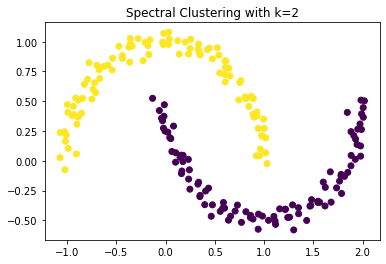

In [32]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(data)

# plot the results
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Spectral Clustering with k=2')
plt.show()

We can see that spectral clustering also successfully separated the data into two clusters, which are similar to the clusters formed by hierarchical clustering with Euclidean distance and average linkage. However, the boundary between the clusters is not as well-defined as in the hierarchical clustering result.

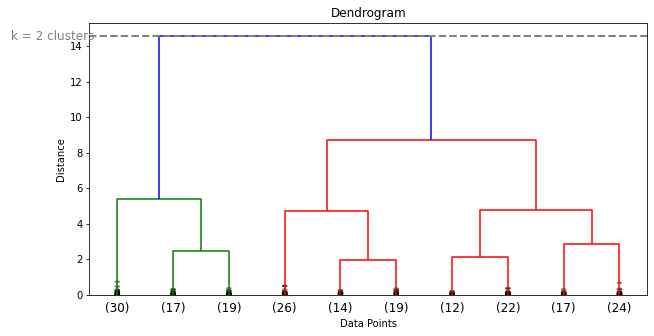

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data, method='ward', metric='euclidean')

# plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=10, show_contracted=True)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')

# plot the line for k clusters
k = 2 # change this to your selected value of k
plt.axhline(y=Z[-k+1, 2], c='gray', ls='--', lw=2)
plt.text(0.95, Z[-k+1, 2], f' k = {k} clusters', va='center', ha='right', fontsize=12, color='gray')

plt.show()

The dendrogram shows how the samples are merged at different distances to form clusters. The height of each node in the dendrogram represents the distance between the clusters being merged. The dendrogram is read from bottom to top, where each leaf represents a single sample, and each internal node represents a merged cluster.

The dotted gray line in the dendrogram represents the threshold distance at which k clusters are formed. In this case, we selected k=2, and the red line intersects with the dendrogram at a distance of 15, which indicates that the samples are merged into three clusters at this distance.

The dendrogram allows us to visually inspect the cluster hierarchy and decide on an appropriate number of clusters.